### Loading our libraries 

In [5]:
#Importing Regular Expressions module 
import re

# Importing numpy 
import numpy as np

# ....... Pandas 
import pandas as pd

# ........ Tensorflow 
import tensorflow as tf
# ......... Matplotlib 
import matplotlib.pyplot as plt

# ..........Pandas 
import pandas as pd

# Importing train test split from Sklearn 
from sklearn.model_selection import train_test_split

import os

# load the libraries
import numpy as np

import warnings
warnings.filterwarnings("ignore")
import cv2
from tqdm import tqdm


### Data Loading

In [6]:
DATADIR = "/Users/cyprian/Documents/covid19-pneumonia-normal-chest-xraypa-dataset/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset"


CATEGORIES = ['covid', 'normal', 'pneumonia']




### Visualize the data 

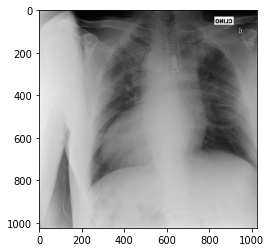

In [11]:
for  category in CATEGORIES:

    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break 

    break 

In [12]:
print(img_array)

[[[253 253 253]
  [252 252 252]
  [251 251 251]
  ...
  [188 188 188]
  [188 188 188]
  [188 188 188]]

 [[248 248 248]
  [247 247 247]
  [239 239 239]
  ...
  [  4   4   4]
  [  4   4   4]
  [  5   5   5]]

 [[240 240 240]
  [241 241 241]
  [229 229 229]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[252 252 252]
  [244 244 244]
  [230 230 230]
  ...
  [223 223 223]
  [233 233 233]
  [239 239 239]]

 [[253 253 253]
  [252 252 252]
  [243 243 243]
  ...
  [229 229 229]
  [237 237 237]
  [242 242 242]]

 [[255 255 255]
  [255 255 255]
  [252 252 252]
  ...
  [239 239 239]
  [243 243 243]
  [246 246 246]]]


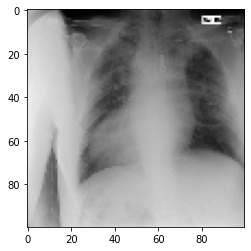

In [42]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

### Building our training data!

In [43]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # Do pneumonia, covid and normal 

        path = os.path.join(DATADIR,category)  # create path to pneumonia, covid and normal 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1 or a 2 )

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           

create_training_data()

print(len(training_data))

100%|██████████| 1525/1525 [00:11<00:00, 133.74it/s]

4575


### Shuffling our data 

Next, we want to shuffle the data. Right now our data is just all pneumonia, then normal and covid. This will usually end up causing trouble as, initially, the classifier will learn to just predict  pneumonia, normal and covid

In [44]:
import random

random.shuffle(training_data)

### Viewing  the shaffled data.

In [45]:
for sample in training_data[:100]:
    print(sample[1])

0
1
2
0
1
0
1
1
1
0
1
0
1
1
0
2
0
2
2
0
2
1
2
2
1
1
2
2
1
0
0
2
2
2
0
2
2
2
2
0
1
0
2
2
1
0
2
1
2
2
0
1
2
2
0
1
0
0
0
1
1
0
0
0
1
0
2
0
0
0
1
0
1
2
0
2
2
2
0
2
1
1
1
2
1
0
1
1
0
0
1
2
0
1
1
2
2
1
1
2


### Making our model 

In [46]:
X=[]
y=[]

In [47]:

for features,label in training_data:
    X.append(features)
    y.append(label)

In [48]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

### Loading our current scripts 

In [49]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

### Making the predictions 

In [50]:
# Loading the libraries 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [51]:

def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block


In [53]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [56]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
       
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

### Final Predictions 